In [1]:
# BASED ON RASCHKA (2015) AND BROWNLEE (2016) AND GERON (2017)

import matplotlib.pyplot as plt
import numpy as np
import pandas

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils

from keras import backend as K
K.set_image_dim_ordering('th')

import time
%matplotlib inline

Using TensorFlow backend.
/usr/local/src/conda3_runtime/home/envs/DSX-Python35-Spark/lib/python3.5/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [14]:
# OBTAIN - ASSIGN MNIST TO VARIABLES

(X_train, y_train), (X_test, y_test) = mnist.load_data()

print('Rows: %d, columns: %d' % (X_train.shape[0], X_train.shape[1]))

print('Rows: %d, columns: %d' % (X_test.shape[0], X_test.shape[1]))

Rows: 60000, columns: 28
Rows: 10000, columns: 28


In [15]:
# SCRUB - WITH THIS IMPORT METHOD WE NEED TO CONVERT TO VECTOR

num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')

print('Rows: %d, columns: %d' % (X_train.shape[0], X_train.shape[1]))

print('Rows: %d, columns: %d' % (X_test.shape[0], X_test.shape[1]))

Rows: 60000, columns: 784
Rows: 10000, columns: 784


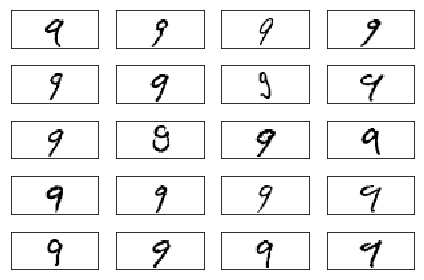

In [16]:
# EXPLORE - VISUALIZE DIFFERENT VARIATIONS OF 9

fig, ax = plt.subplots(nrows=5, ncols=4, sharex=True, sharey=True,)
ax = ax.flatten()
for i in range(20):
    img = X_train[y_train == 9][i].reshape(28, 28)
    ax[i].imshow(img, cmap='Greys', interpolation='nearest')

ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()

In [17]:
# SCRUB - TRANSFORM - N

X_train = X_train / 255
X_test = X_test / 255

In [18]:
# SCRUB - TRANSFORM FROM VECTOR TO BINARY MATRIX

y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

In [19]:
# MODEL - BUILD BASE MODEL FOR MLP

def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(num_pixels, input_dim=num_pixels, kernel_initializer='normal', activation='relu'))
    model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [20]:
# MODEL - FIT THE BASE MODEL

start = time.time()  # TRACK TIME

model = baseline_model()
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2)

# MODEL - RESULTS

scores = model.evaluate(X_test, y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

end = time.time()
final_time = end-start
print(final_time)  # RUN TIME OF BLOCK

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
5s - loss: 0.2838 - acc: 0.9193 - val_loss: 0.1464 - val_acc: 0.9572
Epoch 2/10
5s - loss: 0.1127 - acc: 0.9677 - val_loss: 0.0911 - val_acc: 0.9736
Epoch 3/10
5s - loss: 0.0721 - acc: 0.9788 - val_loss: 0.0763 - val_acc: 0.9763
Epoch 4/10
5s - loss: 0.0510 - acc: 0.9852 - val_loss: 0.0662 - val_acc: 0.9796
Epoch 5/10
5s - loss: 0.0367 - acc: 0.9896 - val_loss: 0.0621 - val_acc: 0.9803
Epoch 6/10
5s - loss: 0.0276 - acc: 0.9923 - val_loss: 0.0681 - val_acc: 0.9789
Epoch 7/10
5s - loss: 0.0214 - acc: 0.9946 - val_loss: 0.0653 - val_acc: 0.9802
Epoch 8/10
5s - loss: 0.0148 - acc: 0.9965 - val_loss: 0.0663 - val_acc: 0.9788
Epoch 9/10
5s - loss: 0.0106 - acc: 0.9979 - val_loss: 0.0681 - val_acc: 0.9796
Epoch 10/10
5s - loss: 0.0085 - acc: 0.9982 - val_loss: 0.0626 - val_acc: 0.9808
Baseline Error: 1.92%
58.64673209190369


## COMPARISON WITH CONVOLUTION NETWORK

In [21]:
# OBTAIN - 2 - RELOAD INTO PIXELS WIDTH HEIGHT

(X_train, y_train), (X_test, y_test) = mnist.load_data()

# SCRUB INTO PIXELS WIDTH HEIGHT

X_train = X_train.reshape(X_train.shape[0], 1, 28, 28).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 1, 28, 28).astype('float32')


In [22]:
# SCRUB - NORMALIZE AND BUILD CLASS MATRIX

X_train = X_train / 255
X_test = X_test / 255

y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

In [23]:
# MODEL BUILD BASELINE

def baseline_cnn():
    # create model
    model = Sequential()  # ORDER FOR RUN
    model.add(Conv2D(32, (5, 5), input_shape=(1, 28, 28), activation='relu'))   # INPUT LAYER - LOOKING FOR PIXELS WIDTH HEIGHT = 
    model.add(MaxPooling2D(pool_size=(2, 2)))  # POOLING LAYER - USED TO REDUCE SPATIAL DIMENSIONS - WILL REDUCE BY PICKING LARGEST VALUE IN SLIDING 2x2 WINDOW
    model.add(Dropout(0.2))  # RANDOMLY EXCLUDE 20% OF NEURONS - HELPS MINIMIZE OVERFITTING
    model.add(Flatten())  # CONVERTING TO VECTOR
    model.add(Dense(128, activation='relu'))  # LARGE LAYER (FOR THIS MODEL - 128 NEURONS) - ACTIVATION FUNCTION IS f(x) = log(1 + exp x) 
    model.add(Dense(num_classes, activation='softmax'))  # MAPS VECTOR TO SPECIFIC CLASS OR TARGET VALUE
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])  # OPTIMIZER - https://arxiv.org/abs/1412.6980v8
                                                                                            # LEARNING RATE 0.001
    return model


In [24]:
# MODEL - FIT - https://keras.io/models/model/

start = time.time()  # TRACK TIME

model = baseline_cnn()
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2)  # BATCH SIZE CAN HELP WITH MEMORY - HOWEVER SMALLER BATCH MIGHT REDUCE ACCURACY
                                                                                                     # NUMBER OF EPOCHS  IS NUMBER OF TIMES THROUGH NETWORK   
                                                                                                     # 300 ITERATIONS PER EPOCH
                                                                                                     # VERBOSE - ONE LINE PER EPOCH

# MODEL - RESULTS
scores = model.evaluate(X_test, y_test, verbose=0)
print("CNN Error: %.2f%%" % (100-scores[1]*100))

end = time.time()
final_time = end-start
print(final_time)  # RUN TIME OF BLOCK

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
105s - loss: 0.2519 - acc: 0.9265 - val_loss: 0.0812 - val_acc: 0.9745
Epoch 2/10
105s - loss: 0.0739 - acc: 0.9778 - val_loss: 0.0486 - val_acc: 0.9846
Epoch 3/10
105s - loss: 0.0517 - acc: 0.9847 - val_loss: 0.0388 - val_acc: 0.9864
Epoch 4/10
105s - loss: 0.0414 - acc: 0.9874 - val_loss: 0.0430 - val_acc: 0.9869
Epoch 5/10
105s - loss: 0.0344 - acc: 0.9892 - val_loss: 0.0552 - val_acc: 0.9813
Epoch 6/10
104s - loss: 0.0283 - acc: 0.9908 - val_loss: 0.0350 - val_acc: 0.9894
Epoch 7/10
105s - loss: 0.0229 - acc: 0.9930 - val_loss: 0.0346 - val_acc: 0.9888
Epoch 8/10
105s - loss: 0.0198 - acc: 0.9938 - val_loss: 0.0297 - val_acc: 0.9898
Epoch 9/10
105s - loss: 0.0165 - acc: 0.9949 - val_loss: 0.0359 - val_acc: 0.9887
Epoch 10/10
105s - loss: 0.0154 - acc: 0.9949 - val_loss: 0.0260 - val_acc: 0.9926
CNN Error: 0.74%
1064.5658180713654


## WHAT IF WE CHANGE OPTIMIZER?

In [26]:
# MODEL STOCHASTIC GRADIENT DESCENT MODEL  - https://keras.io/optimizers/

def baseline_cnnsgd():
    # create model
    model = Sequential()  # ORDER FOR RUN
    model.add(Conv2D(32, (5, 5), input_shape=(1, 28, 28), activation='relu'))   # INPUT LAYER - LOOKING FOR PIXELS WIDTH HEIGHT = 
    model.add(MaxPooling2D(pool_size=(2, 2)))  # POOLING LAYER - USED TO REDUCE SPATIAL DIMENSIONS - WILL REDUCE BY PICKING LARGEST VALUE IN SLIDING 2x2 WINDOW
    model.add(Dropout(0.2))  # RANDOMLY EXCLUDE 20% OF NEURONS - HELPS MINIMIZE OVERFITTING
    model.add(Flatten())  # CONVERTING TO VECTOR
    model.add(Dense(128, activation='relu'))  # LARGE LAYER (FOR THIS MODEL - 128 NEURONS) - ACTIVATION FUNCTION IS f(x) = log(1 + exp x) 
    model.add(Dense(num_classes, activation='softmax'))  # MAPS VECTOR TO SPECIFIC CLASS OR TARGET VALUE
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='SGD', metrics=['accuracy'])  # OPTIMIZER - https://github.com/keras-team/keras/blob/master/keras/optimizers.py#L157
                                                                                            # LEARNING RATE 0.01
    return model


In [27]:
# MODEL - FIT

start = time.time()  # TRACK TIME

model2 = baseline_cnnsgd()
model2.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2)  

# MODEL - RESULTS
scores = model2.evaluate(X_test, y_test, verbose=0)
print("CNN Error: %.2f%%" % (100-scores[1]*100))

end = time.time()
final_time = end-start
print(final_time)  # RUN TIME OF BLOCK

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
104s - loss: 1.2941 - acc: 0.6691 - val_loss: 0.4577 - val_acc: 0.8799
Epoch 2/10
104s - loss: 0.4276 - acc: 0.8763 - val_loss: 0.3261 - val_acc: 0.9083
Epoch 3/10
104s - loss: 0.3529 - acc: 0.8954 - val_loss: 0.2840 - val_acc: 0.9186
Epoch 4/10
104s - loss: 0.3151 - acc: 0.9080 - val_loss: 0.2574 - val_acc: 0.9253
Epoch 5/10
104s - loss: 0.2860 - acc: 0.9157 - val_loss: 0.2337 - val_acc: 0.9333
Epoch 6/10
104s - loss: 0.2635 - acc: 0.9221 - val_loss: 0.2171 - val_acc: 0.9384
Epoch 7/10
105s - loss: 0.2439 - acc: 0.9284 - val_loss: 0.1994 - val_acc: 0.9432
Epoch 8/10
105s - loss: 0.2264 - acc: 0.9335 - val_loss: 0.1866 - val_acc: 0.9461
Epoch 9/10
104s - loss: 0.2102 - acc: 0.9384 - val_loss: 0.1749 - val_acc: 0.9508
Epoch 10/10
103s - loss: 0.1968 - acc: 0.9422 - val_loss: 0.1621 - val_acc: 0.9535
CNN Error: 4.65%
1056.7240617275238
